In [4]:
# !pip3 install pandas-datareader
# !pip3 install yfinance
# !pip3 install Sequential
# !pip3 install keras
# !pip3 install tensorflow

In [5]:
import numpy as np
from sklearn.metrics import r2_score
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from keras import layers
from keras import ops
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [22]:
# 株価取得
s_target = 'V'
df = pdr.get_data_yahoo(s_target, start='2014-01-01', end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,55.384998,55.507500,54.875000,55.252499,51.331997,10654000
2014-01-03,55.437500,55.622501,55.057499,55.290001,51.366852,7809600
2014-01-06,55.294998,55.577499,54.897499,54.957500,51.057930,8577600
2014-01-07,55.187500,55.527500,55.115002,55.377499,51.448128,8178000
2014-01-08,55.355000,55.750000,55.160000,55.555000,51.613033,8487200


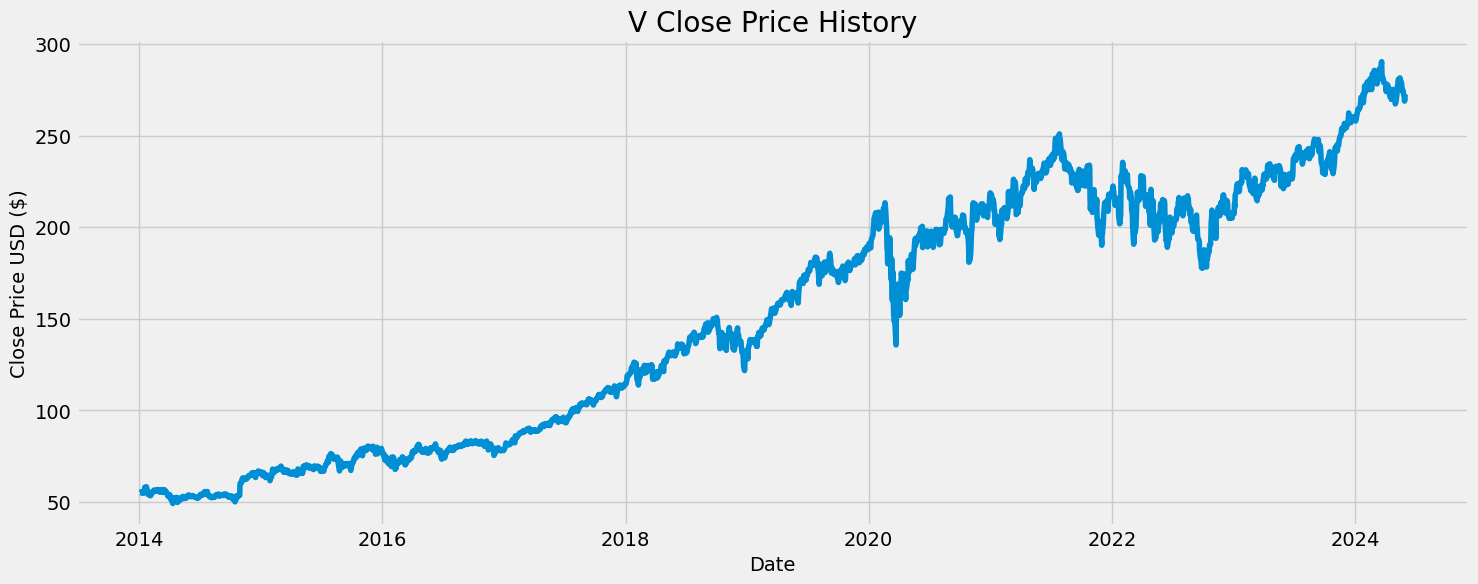

In [23]:
# 過去株価の描画
plt.figure(figsize=(16,6))
plt.title(s_target + ' Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.show()

In [24]:
# Close(終値)のデータ
data = df.filter(['Close'])
dataset = data.values

# データを0〜1の範囲に正規化
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02526817],
       [0.02542364],
       [0.02404519],
       ...,
       [0.91082547],
       [0.92094105],
       [0.9257501 ]])

In [25]:
# 全体の80%をトレーニングデータとして扱う
training_data_len = int(np.ceil( len(dataset) * .8 ))

In [26]:
# どれくらいの期間をもとに予測するか
window_size = 60

train_data = scaled_data[0:int(training_data_len), :]

# train_dataをx_trainとy_trainに分ける
x_train, y_train = [], []
for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

# numpy arrayに変換
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [28]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x_train, y_train, batch_size=32, epochs=5)
model.summary()

Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - loss: 0.0344
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0027
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 124ms/step - loss: 0.0021
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0023
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0020


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [29]:
# テストデータを作成
test_data = scaled_data[training_data_len - window_size: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

# numpy arrayに変換
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [30]:
# 予測を実行する
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# 二乗平均平方根誤差（RMSE）
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

# 決定係数(r2)
r2s = r2_score(y_test, predictions)
print(r2s)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step
9.367860513145098
0.8853001052660833


/var/folders/qp/xhbtrt1n2k3_1bqjmm7jyxjr0000gn/T/ipykernel_51301/3339233618.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


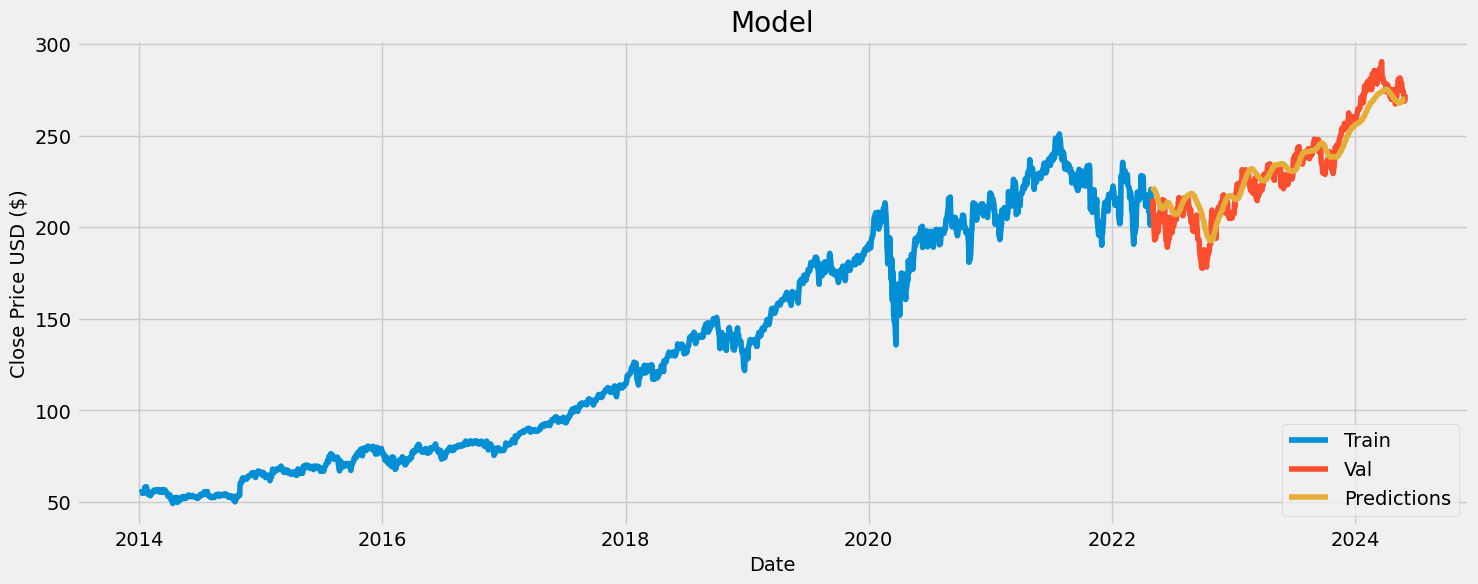

In [31]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()